In [1]:
from lib.pipeline import Pipeline
from lib.disable_logger import DisableLogger

data = []

for train_layer in range(0, 5):
    for trial in range(3):
        pipeline = Pipeline(
                    model='bert',
                    dataset='atpbind',
                    gpus=[1],
                    model_kwargs={
                        'freeze_bert': False,
                        'freeze_layer_count': 30 - train_layer,
                    })
        for epoch in range(5):
            with DisableLogger():
                pipeline.train(num_epoch=1)
                data.append((train_layer, trial, epoch, pipeline.evaluate()))
            print(data[-1])


get dataset atpbind
Split num:  [346, 42, 41]
train samples: 346, valid samples: 42, test samples: 41
(0, 0, 0, {'micro_auroc': tensor(0.8442, device='cuda:1'), 'mcc': 0.3718780150020585})
(0, 0, 1, {'micro_auroc': tensor(0.8484, device='cuda:1'), 'mcc': 0.371579083487473})
(0, 0, 2, {'micro_auroc': tensor(0.8418, device='cuda:1'), 'mcc': 0.3576795925204388})
(0, 0, 3, {'micro_auroc': tensor(0.8588, device='cuda:1'), 'mcc': 0.39622575489003203})
(0, 0, 4, {'micro_auroc': tensor(0.8642, device='cuda:1'), 'mcc': 0.40257047659525746})
(0, 1, 0, {'micro_auroc': tensor(0.8444, device='cuda:1'), 'mcc': 0.35188549691263343})
(0, 1, 1, {'micro_auroc': tensor(0.8496, device='cuda:1'), 'mcc': 0.38216355390278534})
(0, 1, 2, {'micro_auroc': tensor(0.8427, device='cuda:1'), 'mcc': 0.36369240669672376})
(0, 1, 3, {'micro_auroc': tensor(0.8592, device='cuda:1'), 'mcc': 0.4144770858359002})
(0, 1, 4, {'micro_auroc': tensor(0.8623, device='cuda:1'), 'mcc': 0.39512771240149297})
(0, 2, 0, {'micro_auroc

KeyboardInterrupt: 

In [5]:
data = [d for d in data if d[0] < 4]

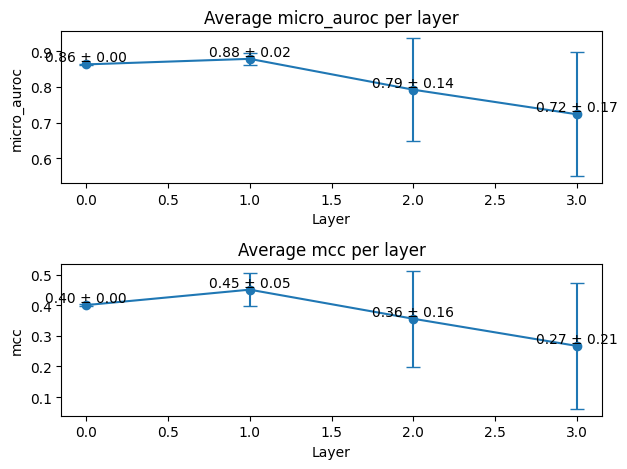

In [18]:
import matplotlib.pyplot as plt
from statistics import mean

layers = np.unique([d[0] for d in data])
metrics = {'micro_auroc': [], 'mcc': []}
avg_metrics = {'micro_auroc': [], 'mcc': []}
std_metrics = {'micro_auroc': [], 'mcc': []}

for layer in range(4):
    layer_data = [d for d in data if d[0] == layer]
    trials = np.unique([d[1] for d in layer_data])
    
    for trial in range(3):
        trial_data = [d for d in layer_data if d[1] == trial]
        last_epoch_metric = trial_data[-1][3]
        
        metrics['micro_auroc'].append(last_epoch_metric['micro_auroc'].item())
        metrics['mcc'].append(last_epoch_metric['mcc'])
    
    avg_metrics['micro_auroc'].append(np.mean(metrics['micro_auroc']))
    avg_metrics['mcc'].append(np.mean(metrics['mcc']))
    std_metrics['micro_auroc'].append(np.std(metrics['micro_auroc']))
    std_metrics['mcc'].append(np.std(metrics['mcc']))

# Plotting
fig, axs = plt.subplots(2)

# micro_auroc plot
axs[0].errorbar(layers, avg_metrics['micro_auroc'], yerr=std_metrics['micro_auroc'], fmt='-o', capsize=5)
axs[0].set_title('Average micro_auroc per layer')
axs[0].set_xlabel('Layer')
axs[0].set_ylabel('micro_auroc')

# Add labels to micro_auroc data points
for layer, avg, std in zip(layers, avg_metrics['micro_auroc'], std_metrics['micro_auroc']):
    axs[0].text(layer, avg, '%.2f ± %.2f' % (avg, std), ha='center', va='bottom')

# mcc plot
axs[1].errorbar(layers, avg_metrics['mcc'], yerr=std_metrics['mcc'], fmt='-o', capsize=5)
axs[1].set_title('Average mcc per layer')
axs[1].set_xlabel('Layer')
axs[1].set_ylabel('mcc')

# Add labels to mcc data points
for layer, avg, std in zip(layers, avg_metrics['mcc'], std_metrics['mcc']):
    axs[1].text(layer, avg, '%.2f ± %.2f' % (avg, std), ha='center', va='bottom')

plt.tight_layout()
plt.show()
